먼저 저랑 닮은 연예인이 누굴까 생각해본적이 없어서 
인터넷에 연예인 닮은꼴검색 사이트를 검색하였습니다.
Nion 얼굴인식이라는 사이트에서 사진을 넣고 확인을 해보니 서현석이라는 배우랑 83% 닮았다고 나오네요
저는 잘 모르겠습니다 ㅎㅎ; 아무튼 이 사이트도 딥러닝 기반으로 돌아가는 것 같습니다.
딥러닝으로 인증받은 닮은꼴 연예인 서현석님과 대전 최강의 야구단 한화이글스 선수들의 사진을 데이터로 해서
저와 닮은꼴인 사람을 찾아보도록 하겠습니다.
또 혹시 모르니 원빈 강동원 등의 미남배우도 넣어보도록 하겠습니다, 결과가 두렵네요...

file_list: ['김범수.jpg', '원빈.jpg', '강동원.jpg', '서현석.jpg', '정우람.jpg', '김태균.jpg', '권오준2.jpg', '노시환.jpg', '장민재.jpg', '권오준.jpg', '김민우.jpg', '.ipynb_checkpoints', '최재훈.jpg']


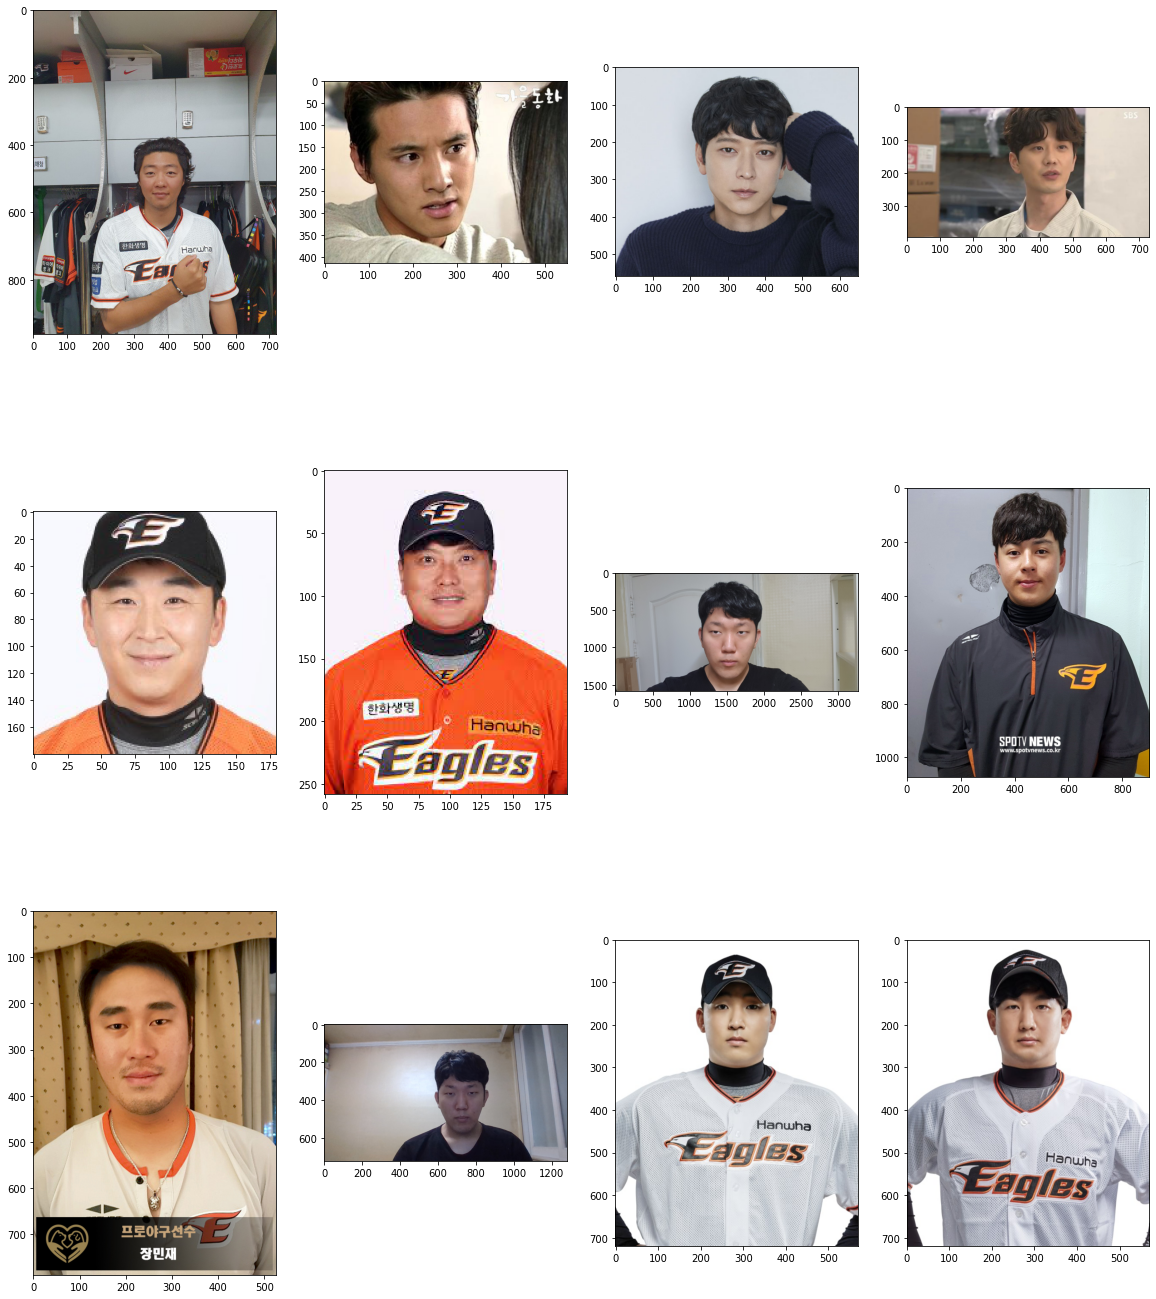

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img


dir_path = os.getenv('HOME')+'/aiffel/Exploration05/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

if '.ipynb_checkpoints' in file_list :
    file_list.remove('.ipynb_checkpoints')

#Set figsize here
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,24))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    if i >= len(file_list) :
        break
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

In [2]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

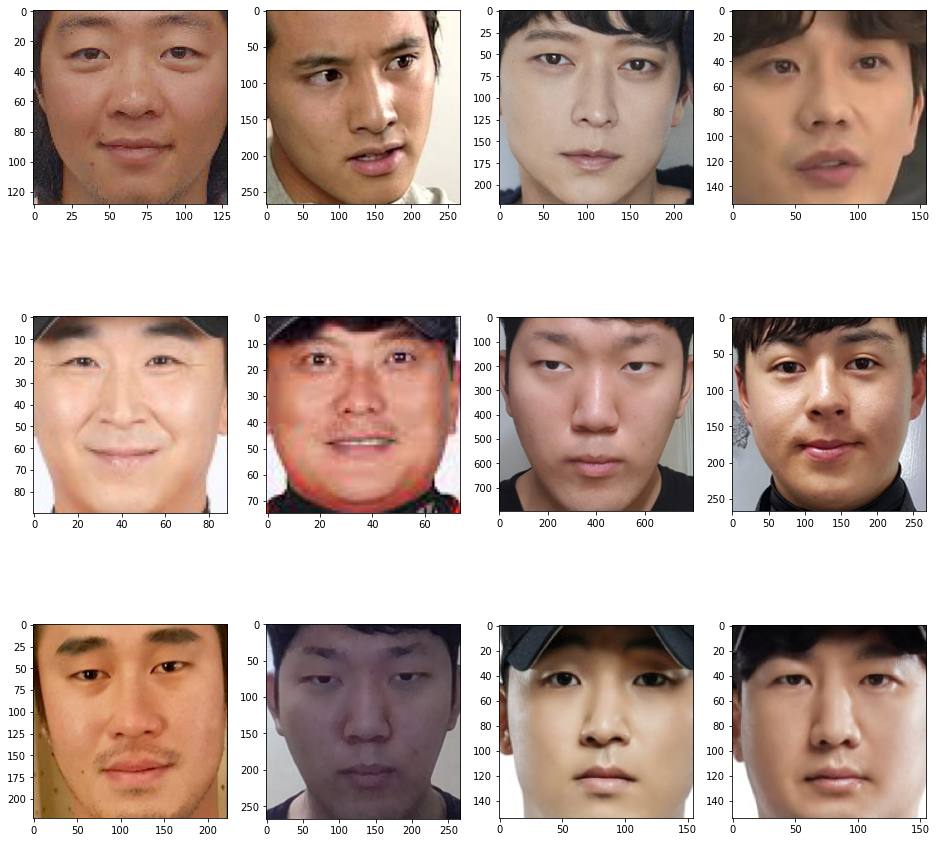

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,16))

for i, ax in enumerate(axes.flatten()):
    if i >= len(file_list) :
        break
    image = get_cropped_face(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

In [4]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    if '.ipynb_checkpoints' in file_list :
        file_list.remove('.ipynb_checkpoints')
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)  
        if len(embedding) > 0 :
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [5]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['강동원']

array([-3.10084894e-02,  7.25008100e-02,  4.03977372e-03, -6.69869930e-02,
       -1.20376468e-01, -1.24342991e-02, -9.91007835e-02, -1.36792302e-01,
        7.55300671e-02, -1.55183092e-01,  1.71341836e-01, -3.60401943e-02,
       -2.36704439e-01, -1.05108686e-01, -3.93886119e-02,  1.57211110e-01,
       -1.19666614e-01, -1.96287587e-01,  1.83256343e-04,  1.17325550e-02,
        1.03878684e-01,  7.13348240e-02,  2.52868012e-02,  7.14028329e-02,
       -9.15220752e-02, -2.67811984e-01, -1.24963090e-01, -1.22142382e-01,
        1.98388286e-02, -7.49159306e-02, -1.42666444e-01, -2.34451964e-02,
       -1.72091872e-01, -3.59276123e-03,  4.66476493e-02,  8.92035365e-02,
        3.86897810e-02, -3.95542458e-02,  1.61184847e-01,  3.22712734e-02,
       -2.54498839e-01,  9.18899700e-02,  5.73970824e-02,  2.32284650e-01,
        2.27357194e-01,  5.63418791e-02, -5.60100563e-03, -1.63303107e-01,
        1.22481182e-01, -1.38132215e-01,  1.21180557e-01,  1.22473739e-01,
        1.29612997e-01,  

In [6]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)
get_distance('권오준', '원빈')

0.6385024967721049

위에서 얼굴영역을 Crop한 이미지들을 바탕으로 원빈님과 저의 임베딩 거리를 측정해보았습니다
0.63... 이면 생각보다 가까운 수치 같습니다!
알고리즘님께서 그래도 같은 종족으로는 쳐주는것 같습니다.

In [7]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('권오준')   

In [8]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('권오준',
  array([-0.07816309,  0.05199753,  0.00819322, -0.03383142, -0.09351303,
         -0.04775963, -0.04607457, -0.14591993,  0.13943893, -0.08802976,
          0.17832133, -0.03724206, -0.26774585, -0.10976841, -0.0757141 ,
          0.16620006, -0.13187537, -0.13484988, -0.0572194 ,  0.04005212,
          0.11343079,  0.04195248,  0.00052986, -0.00444665, -0.12414254,
         -0.31313217, -0.08028221, -0.05390018, -0.07195462, -0.03612608,
         -0.06154424,  0.07746147, -0.17846853, -0.05753268,  0.05765804,
          0.0719865 , -0.00857767, -0.03203369,  0.1833415 ,  0.00308161,
         -0.24722128, -0.00208047,  0.06354383,  0.2371837 ,  0.17015488,
         -0.00712626,  0.03668868, -0.16959095,  0.10360286, -0.15977655,
          0.02097049,  0.16134857,  0.08109478,  0.07566687, -0.00124886,
         -0.11252166,  0.02727938,  0.07891967, -0.09603934,  0.02088144,
          0.14473823, -0.09721289, -0.11001847, -0.09384368,  0.22486693,
          0.00714979, -0.1527

In [9]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name) 
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top + 1) :
        if i == 0 : 
            continue
        print("순위{}:이름({}),거리({}".format(i,sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))
    return sorted_faces

순위1:이름(권오준2),거리(0.20450259866221698
순위2:이름(김범수),거리(0.4201833721804174
순위3:이름(최재훈),거리(0.4216169701339663
순위4:이름(서현석),거리(0.42231919864697864
순위5:이름(김민우),거리(0.45329085166697236
순위6:이름(정우람),거리(0.5275442714951397
순위7:이름(장민재),거리(0.5321570257417977
순위8:이름(김태균),거리(0.5471497384870384
순위9:이름(강동원),거리(0.5866472692428016
순위10:이름(원빈),거리(0.6385024967721049
순위11:이름(노시환),거리(0.6454019319194749


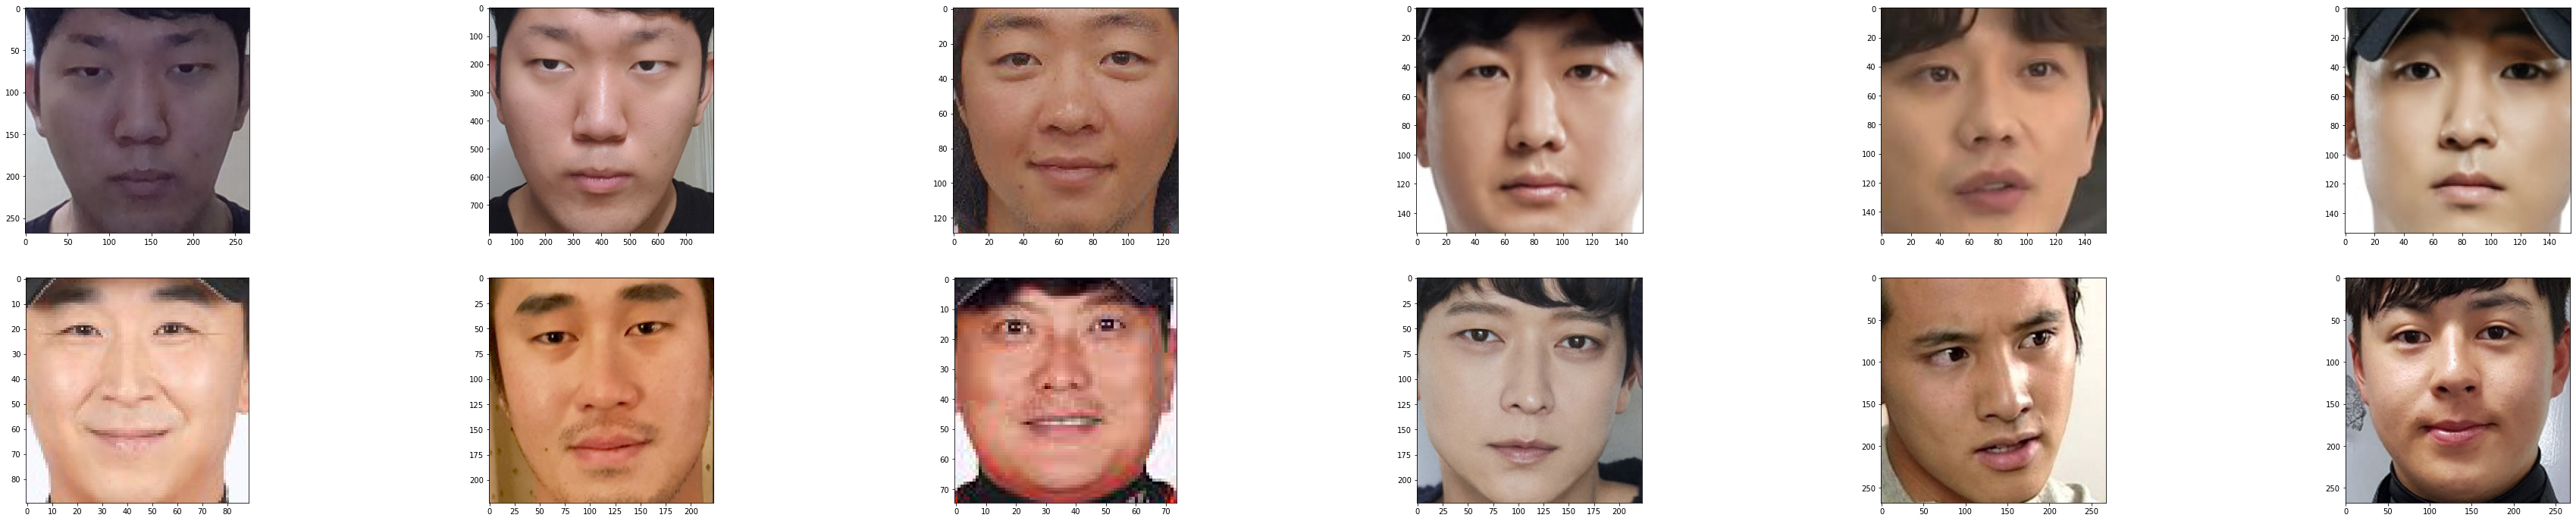

In [10]:
faceRank = get_nearest_face('권오준',top=11)
#print(faceRank)
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(64,12))

for i, ax in enumerate(axes.flatten()):
    if i >= len(faceRank) :
        break
    image = get_cropped_face(dir_path+'/'+faceRank[i][0]+'.jpg')
    ax.imshow(image)
plt.show()

fig.tight_layout()

사진들을 순위별로 정렬해 보았습니다

제 다른 사진과 비교했을때 임베딩 벡터 거리가 매우 낮습니다.
알고리즘이 얼굴의 닮은 정도를 잘 측정한다는 뜻으로 볼 수 있습니다.

저와 가장 닮은 한화이글스 선수는 김범수 선수인걸로 나왔네요
이렇게 비교해보니 닮은거같기도 합니다.
서현석 배우와도 Nion에서 나온 결과처럼 임베딩거리가 꽤 가까운 편이네요

강동원, 원빈과는 상대적으로 닮지 않았다고 해석할 수 있겠습니다
꽤 정확하네요 ㅠ...
이국적인 외모의 노시환 선수와도 임베딩거리가 멀게 나왔습니다.

데이터가 많지 않았는데도 꽤 괜찮은 결과가 나온다는게 신기합니다
기술을 응용하면 닮은꼴을 찾아주는 것뿐만이 아니라 딥러닝 알고리즘으로 새로운 얼굴을 만들어낼수도 있겠다는 생각이 듭니다